# Statistics of MFCC on Laughter data

* [Summary](#Summary)

----
## Summary

* 

In [1]:
# Load data and as well as necessary modules
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import stats
import pandas as pd
from IPython.display import display

with open("NewData.csv", 'rt') as f:
    #f = open("MartixOfWindowAverageAllMFCC.csv", 'rt')
    data = []
    laugh_data = []
    talk_data = []
    try:
        reader = csv.reader(f)
        #header = next(reader)
        for row in reader:
            data.append(np.array(row))
            if(row[-1] == '1'):
                laugh_data.append(row)
            else:
                talk_data.append(row)                    
            #data.append(row)
    finally:
        f.close()
    
#header = np.array(header)
header = np.array(['MFC0','MFC1','MFC2','MFC3','MFC4','MFC5','MFC6','MFC7','MFC8',\
                   'MFC9','MFC10','MFC11','MFC12'
                  ])
data = np.array(data) # data[patient, datafield] # all data is strings, even numbers
laugh_data = np.array(laugh_data,float)
talk_data = np.array(talk_data,float)
features = np.array(range(13))
Xorig_nd = np.array(data[:,features],float)
n,d = Xorig_nd.shape
print(Xorig_nd.shape)
y_n = np.array(data[:,-1],float)

#df_features = pd.DataFrame(columns=header[key_stats])
#display(df_features)
display(pd.DataFrame(header[features],columns=['features']))


(40021, 13)


,features
0,MFC0
1,MFC1
2,MFC2
3,MFC3
4,MFC4
5,MFC5
6,MFC6
7,MFC7
8,MFC8
9,MFC9


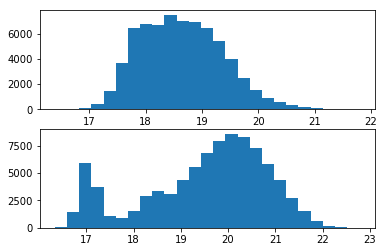

In [2]:
plt.subplot(211)
plt.hist(laugh_data[:,0], bins=25)
plt.subplot(212)
plt.hist(talk_data[:,0], bins=25)
plt.show()

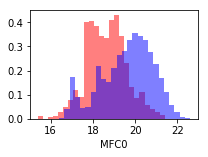

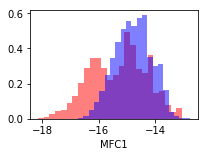

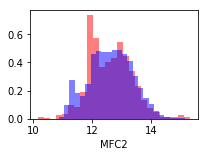

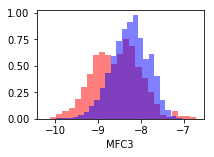

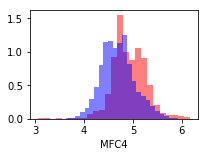

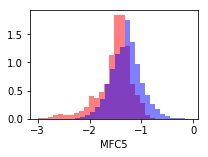

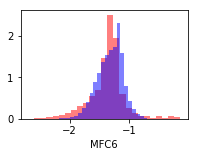

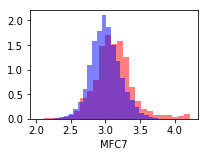

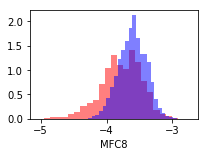

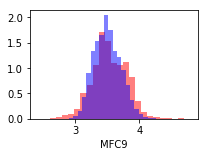

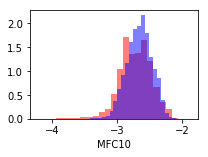

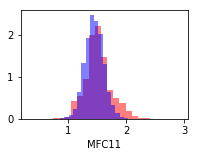

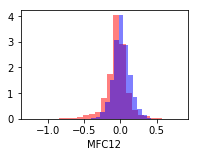

In [2]:
# Distributions of each feature
#plt.figure(figsize=(15,24))
for feature in range(len(features)):
    #plt.subplot(len(features)/3+1,3,feature + 1)
    plt.figure(figsize=(3,2))
    n, bins, patches = plt.hist(laugh_data[:,feature], bins=25, normed=1, facecolor='red', alpha=0.5)
    n, bins, patches = plt.hist(talk_data[:,feature], bins=25, normed=1, facecolor='blue', alpha=0.5)
    plt.xlabel(header[features[feature]])
    plt.show()
#plt.tight_layout()

### KNN

using the MFCC's only try logistic regression classification
  -try using all MFCC features
  - first no regularization, 
  - with L1 regularization

-have a for loop for trying cross validation
-have a loop for checking regularization



In [4]:
features = list(range(0,13))
print(header[features])
X_nd = Xorig_nd[:,features]


['MFC0' 'MFC1' 'MFC2' 'MFC3' 'MFC4' 'MFC5' 'MFC6' 'MFC7' 'MFC8' 'MFC9'
 'MFC10' 'MFC11' 'MFC12']


/home/mtran/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


confusion matrix:
 [[2967 1034]
 [ 676 3328]]
test accuracy: 0.786383510306
train accuracy:  0.80694027986
confusion matrix:
 [[3582  418]
 [ 853 3151]]
test accuracy: 0.841204397801
train accuracy:  0.808539213543
confusion matrix:
 [[1443 2557]
 [  96 3908]]
test accuracy: 0.668540729635
train accuracy:  0.828309960334
confusion matrix:
 [[2812 1188]
 [ 742 3262]]
test accuracy: 0.758870564718
train accuracy:  0.821969578661
confusion matrix:
 [[3174  826]
 [2504 1500]]
test accuracy: 0.58395802099
train accuracy:  0.878626979417


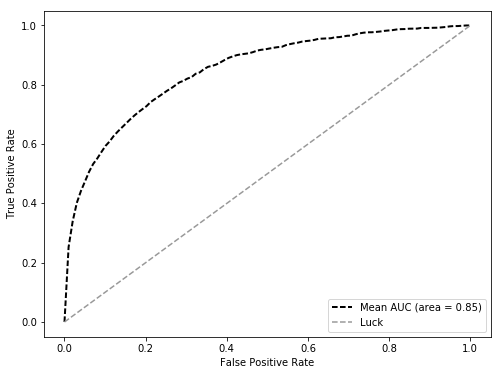

In [3]:
from sklearn import linear_model
from sklearn import cross_validation # for chopping up data into test and train
from sklearn import metrics # for ROC stats
from scipy import interp #@ for interpolating ROC curve from incomplete data
'''
from sklearn.preprocessing import PolynomialFeatures
'''

PRINT = True
# data is in 
# X_nd and y_n

features = list(range(0,13))

X_nd = Xorig_nd[:,features]


clf = linear_model.LogisticRegression(penalty='l2',C=1e5)
cv = cross_validation.StratifiedKFold(y_n, n_folds=5)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_acc = []

for i, (train, test) in enumerate(cv):
    probas_ = clf.fit(X_nd[train], y_n[train]).predict_proba(X_nd[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y_n[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    #plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    #print confusion matrix and F1
    predicted = clf.predict(X_nd[test])
    all_acc.append(metrics.accuracy_score(predicted,y_n[test]))
    #print('F1 score:', metrics.f1_score(predicted,y_n[test]))
    print('confusion matrix:\n', metrics.confusion_matrix(y_n[test],predicted))
    print("test accuracy:",metrics.accuracy_score(predicted,y_n[test]))
    print("train accuracy: ",clf.score(X_nd[train],y_n[train]))


mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
#print('Mean metrics over folds:')
mean_acc = sum(all_acc)/len(cv)
#print('  acc:','{:.2f}'.format(mean_acc))
mean_auc = metrics.auc(mean_fpr, mean_tpr)
#print('mean ROC AUC:',mean_auc)
fract1 = sum(y_n)/len(y_n)
if 1 or mean_auc > 0.6:
    #print('---------------------------------------------')
    #print(features)
    #print(header[q])
    #print(header[key_stats[list(features)]], mean_auc, mean_acc)
    #good_results.append([header[q],header[key_stats[list(features)]],
    #                         mean_auc,mean_acc,fract1])
    if PRINT:
        plt.figure(figsize=(8,6))
        plt.plot(mean_fpr, mean_tpr, 'k--',
                 label='Mean AUC (area = %0.2f)' % mean_auc, lw=2)
        plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        #plt.title(str(header[key_stats[list(features)]]) + ' cross-validated ROC curve')
        plt.legend(loc="lower right")
        plt.show()

#display(pd.DataFrame(good_results,columns=['question','features','mean ROC AUC','mean accuracy', 'fraction=1']))


## Prediction
Logistic Regression (maximum entropy)

MFC0 MFC1


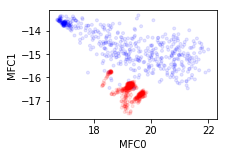

MFC0 MFC2


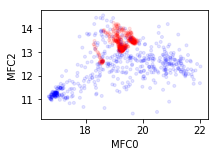

MFC0 MFC3


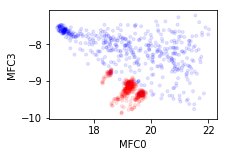

MFC0 MFC4


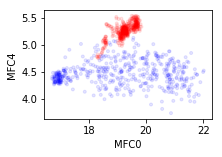

MFC1 MFC2


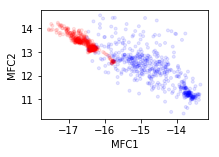

MFC1 MFC3


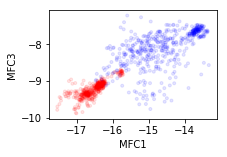

MFC1 MFC4


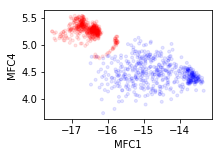

MFC2 MFC3


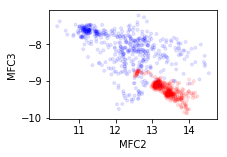

MFC2 MFC4


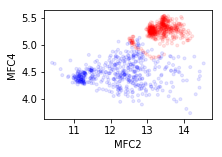

MFC3 MFC4


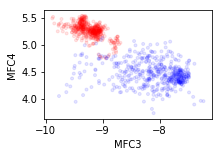

In [5]:
d = 2
test_size = 500
train_size = 500
for i in range (0,5):
    for j in range (i+1,5):
        features = [i,j]
        print(header[i],header[j])
        X_nd = Xorig_nd[:,features]
        test_range = list(range(0,test_size)) + list(range(-test_size,-1))
        train_range =  list(range(test_size,test_size + train_size)) + \
                       list(range(-(test_size + train_size),-test_size))
        X_nd_test = X_nd[test_range,:]
        y_n_test = y_n[test_range]
        color = ['r' if y==1 else 'b' for y in y_n_test]
        plt.figure(figsize=(3,2))
        plt.scatter(X_nd_test[:,0],X_nd_test[:,1],marker='.',c=color,alpha=0.1)
        plt.xlabel(header[i])
        plt.ylabel(header[j])
        plt.show()
        y_n_test

MFC0 MFC1


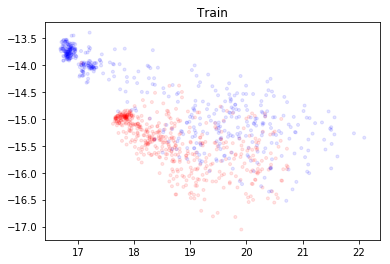

accuracy: 0.926926926927


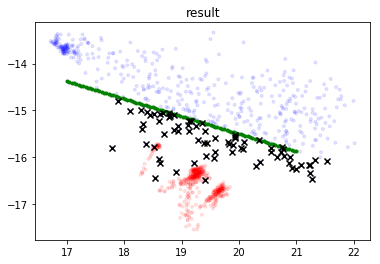

In [6]:
d = 2
test_size = 500
train_size = 500
offset = 20000

features = [0,1]
print(header[0],header[1])
X_nd = Xorig_nd[:,features]
test_range = list(range(0,test_size)) + list(range(-test_size,-1))
train_range =  list(range(test_size+offset,test_size + train_size + offset)) + \
               list(range(-(test_size + train_size+offset),-(test_size+offset)))
X_nd_test = X_nd[test_range,:]
y_n_test = y_n[test_range]
X_nd_train = X_nd[train_range,:]
y_n_train = y_n[train_range]

color = ['r' if y==1 else 'b' for y in y_n_test]
#plt.scatter(X_nd_test[:,0],X_nd_test[:,1],marker='.',c=color,alpha=0.1)
#plt.title('Test')
#plt.show()

plt.scatter(X_nd_train[:,0],X_nd_train[:,1],marker='.',c=color,alpha=0.1)
plt.title('Train')
plt.show()

clf = linear_model.LogisticRegression(penalty='l2',C=1e5)
clf.fit(X_nd_train,y_n_train)

y_n_test_pred = clf.predict(X_nd_test)

accuracy = sum(y_n_test_pred == y_n_test) / len(y_n_test)
print('accuracy:', accuracy)

x_range = np.linspace(17,21,100)
#y_range = np.linspace(-17,-13.5,100)

y_decision = (-clf.intercept_ - x_range*clf.coef_[0][0])/clf.coef_[0][1]

X_test_wrong = X_nd_test[y_n_test_pred != y_n_test,:]
plt.scatter(X_nd_test[:,0],X_nd_test[:,1],marker='.',c=color,alpha=0.1)
plt.scatter(x_range,y_decision,marker='.',c='g')
plt.scatter(X_test_wrong[:,0],X_test_wrong[:,1],marker='x',c='k')
plt.title('result')
plt.show()

In [4]:
with open("S_Deception_testMatrix.csv", 'rt') as f:
    data = []
    try:
        reader = csv.reader(f)
        for row in reader:
            data.append(np.array(row))                   
    finally:
        f.close()
    
data = np.array(data,float) 
y_n_test_pred = clf.predict(data)
print(sum(y_n_test_pred))


5356.0


MFC0 MFC1


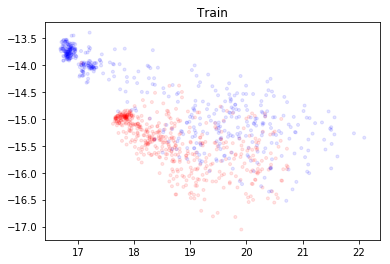

accuracy: 0.92992992993


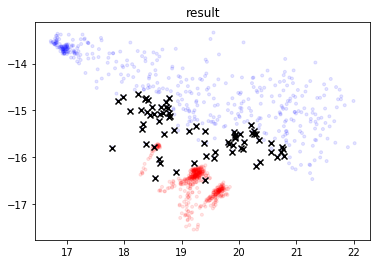

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

d = 2
test_size = 500
train_size = 500
offset = 20000

features = [0,1]
print(header[0],header[1])
X_nd = Xorig_nd[:,features]
test_range = list(range(0,test_size)) + list(range(-test_size,-1))
train_range =  list(range(test_size+offset,test_size + train_size + offset)) + \
               list(range(-(test_size + train_size+offset),-(test_size+offset)))
X_nd_test = X_nd[test_range,:]
y_n_test = y_n[test_range]
X_nd_train = X_nd[train_range,:]
y_n_train = y_n[train_range]

color = ['r' if y==1 else 'b' for y in y_n_test]
#plt.scatter(X_nd_test[:,0],X_nd_test[:,1],marker='.',c=color,alpha=0.1)
#plt.title('Test')
#plt.show()

plt.scatter(X_nd_train[:,0],X_nd_train[:,1],marker='.',c=color,alpha=0.1)
plt.title('Train')
plt.show()

clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf.fit(X_nd_train,y_n_train)

y_n_test_pred = clf.predict(X_nd_test)

accuracy = sum(y_n_test_pred == y_n_test) / len(y_n_test)
print('accuracy:', accuracy)

x_range = np.linspace(17,21,100)
#y_range = np.linspace(-17,-13.5,100)

#y_decision = (-clf.intercept_ - x_range*clf.coef_[0][0])/clf.coef_[0][1]

X_test_wrong = X_nd_test[y_n_test_pred != y_n_test,:]
plt.scatter(X_nd_test[:,0],X_nd_test[:,1],marker='.',c=color,alpha=0.1)
#plt.scatter(x_range,y_decision,marker='.',c='g')
plt.scatter(X_test_wrong[:,0],X_test_wrong[:,1],marker='x',c='k')
plt.title('result')
plt.show()

F1 score: 0.872045424535
confusion matrix:
 [[3734  267]
 [ 702 3302]]
test accuracy: 0.87895065584
train accuracy:  0.982071464268
F1 score: 0.915240852856
confusion matrix:
 [[3883  117]
 [ 527 3477]]
test accuracy: 0.919540229885
train accuracy:  0.982072024237
F1 score: 0.904202864522
confusion matrix:
 [[3337  663]
 [ 153 3851]]
test accuracy: 0.898050974513
train accuracy:  0.982072024237
F1 score: 0.838136866548
confusion matrix:
 [[3751  249]
 [ 936 3068]]
test accuracy: 0.851949025487
train accuracy:  0.980916388169
F1 score: 0.248202177933
confusion matrix:
 [[3741  259]
 [3400  604]]
test accuracy: 0.542853573213
train accuracy:  0.980541587282


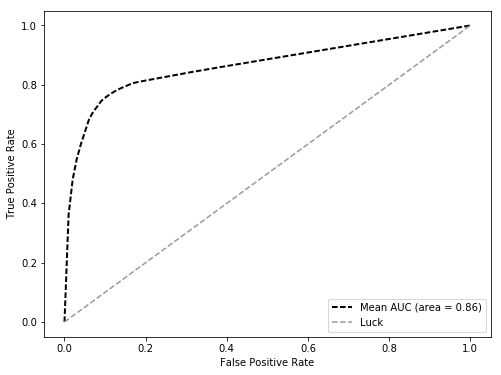

In [4]:
# KNNN code from another project

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale


PRINT = True
# data is in 
# X_nd and y_n

features = list(range(0,13))

X_nd = Xorig_nd[:,features]



clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
cv = cross_validation.StratifiedKFold(y_n, n_folds=5)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_acc = []

for i, (train, test) in enumerate(cv):
    probas_ = clf.fit(X_nd[train], y_n[train]).predict_proba(X_nd[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y_n[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    #plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    #print confusion matrix and F1
    predicted = clf.predict(X_nd[test])
    all_acc.append(metrics.accuracy_score(predicted,y_n[test]))
    print('F1 score:', metrics.f1_score(predicted,y_n[test]))
    print('confusion matrix:\n', metrics.confusion_matrix(y_n[test],predicted))
    print("test accuracy:",metrics.accuracy_score(predicted,y_n[test]))
    print("train accuracy: ",clf.score(X_nd[train],y_n[train]))


mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
#print('Mean metrics over folds:')
mean_acc = sum(all_acc)/len(cv)
#print('  acc:','{:.2f}'.format(mean_acc))
mean_auc = metrics.auc(mean_fpr, mean_tpr)
#print('mean ROC AUC:',mean_auc)
fract1 = sum(y_n)/len(y_n)
if 1 or mean_auc > 0.6:
    #print('---------------------------------------------')
    #print(features)
    #print(header[q])
    #print(header[key_stats[list(features)]], mean_auc, mean_acc)
    #good_results.append([header[q],header[key_stats[list(features)]],
    #                         mean_auc,mean_acc,fract1])
    if PRINT:
        plt.figure(figsize=(8,6))
        plt.plot(mean_fpr, mean_tpr, 'k--',
                 label='Mean AUC (area = %0.2f)' % mean_auc, lw=2)
        plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        #plt.title(str(header[key_stats[list(features)]]) + ' cross-validated ROC curve')
        plt.legend(loc="lower right")
        plt.show()

#display(pd.DataFrame(good_results,columns=['question','features','mean ROC AUC','mean accuracy', 'fraction=1']))

In [5]:
with open("S_Deception_testMatrix.csv", 'rt') as f:
    data = []
    try:
        reader = csv.reader(f)
        for row in reader:
            data.append(np.array(row))                   
    finally:
        f.close()
    
data = np.array(data,float) 
print(data.shape)
x=np.arange(7178)
data=data[x,:]
print(data.shape)




(14363, 13)
(7178, 13)


mfcc[0] mean: -0.0106932938408
(14335, 13)


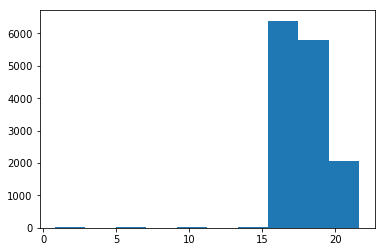

In [7]:
# throw out low power
print("mfcc[0] mean:",np.mean(data[:,12]))
print(data.shape)
#POWER_THRESH = 
plt.hist(data[:,0])
plt.show()

In [6]:
y_n_test_pred = clf.predict(data)
print(sum(y_n_test_pred))
print(y_n_test_pred.shape)

4086.0
(7178,)


In [7]:
with open("S_2016-03-15_19-10-47-33-W-B-Rosethorn.wav_silence.csv", 'rt') as f:
    data = []
    try:
        reader = csv.reader(f)
        for row in reader:
            data.append(np.array(row))                   
    finally:
        f.close()
    
data = np.array(data,float) 

print(data)
print(data.shape)

[[  0.00000000e+00   2.00130000e-01]
 [  2.70000000e+00   1.37500000e+01]
 [  1.55500000e+01   4.59500000e+01]
 [  4.69500000e+01   5.21500000e+01]
 [  5.29500000e+01   6.00000000e+01]
 [  6.10500000e+01   6.67500000e+01]
 [  6.76500000e+01   7.34000000e+01]
 [  7.50000000e+01   8.03500000e+01]
 [  8.25500000e+01   9.09000000e+01]
 [  9.34500000e+01   1.00500000e+02]
 [  1.01750000e+02   1.01900000e+02]
 [  1.04450000e+02   1.04750000e+02]
 [  1.05750000e+02   1.06450000e+02]
 [  1.07800000e+02   1.08400000e+02]
 [  1.13850000e+02   1.20000000e+02]
 [  1.21450000e+02   1.27900000e+02]
 [  1.29100000e+02   1.32850000e+02]
 [  1.34500000e+02   1.43000000e+02]
 [  1.45050000e+02   1.45300000e+02]
 [  1.47400000e+02   1.51850000e+02]
 [  1.53500000e+02   1.55150000e+02]
 [  1.57450000e+02   1.58200000e+02]
 [  1.59750000e+02   1.60150000e+02]
 [  1.62000000e+02   1.69900000e+02]
 [  1.72650000e+02   1.80650000e+02]
 [  1.82700000e+02   1.83800000e+02]
 [  1.86350000e+02   1.86550000e+02]
 

In [8]:
from operator import itemgetter
from itertools import groupby

laugh_moments=[]

for i in range (0,7178):
    if(y_n_test_pred[i]==1):
        laugh_moments.append(i)
        
#laugh_moments=np.array(laugh_moments)*0.05
#print(laugh_moments)

def myfunc(lst):
    ret = []
    a = b = lst[0]                           # a and b are range's bounds

    for el in lst[1:]:
        if el == b+1: b = el                 # range grows
        else:                                # range ended
            ret.append(a if a==b else (a,b)) # is a single or a range?
            a = b = el                       # let's start again with a single
    ret.append(a if a==b else (a,b))         # corner case for last single/range
    return ret

ret=myfunc(laugh_moments)
ret=np.array(ret)

ret=ret.tolist()

length=len(ret)
for i in range (length-1,-1,-1):
    if(isinstance( ret[i], int )):
        ret.remove(ret[i])
print(len(ret))
for i in range (0,219):
    temp=list(ret[i])
    temp[0]*=0.05
    temp[0]=round(temp[0],2)
    temp[1]*=0.05
    temp[1]+=0.3
    temp[1]=round(temp[1],2)
    ret[i]=tuple(temp)



for i in range (218,-1,-1):
    if(ret[i][1]-ret[i][0]<0.3):
        ret.remove(ret[i])

for i in range (218,-1,-1):
    temp=list(ret[i])
    laugh_start=temp[0]
    laugh_end=temp[1]
    for j in range (0,47):
        silence_start=data[j][0]
        silence_end=data[j][1]
        if(silence_start<laugh_start<silence_end<laugh_end or laugh_start<silence_start<laugh_end<silence_end or silence_start<laugh_start<laugh_end<silence_end or laugh_start<silence_start<silence_end<laugh_end):
            ret.remove(ret[i])
            break

print(ret)
        
sum_time=0        
for i in range (0,len(ret)):
    sum_time+=ret[i][1]-ret[i][0]

print(sum_time)
        

219
[(1.6, 2.0), (1.8, 2.35), (2.3, 2.65), (60.7, 61.05), (112.75, 113.1), (184.4, 184.75), (218.7, 219.05), (223.35, 224.0), (287.85, 288.25), (354.0, 354.5), (356.85, 359.15)]
6.549999999999943


In [39]:
with open("S_Deception_testMatrix.csv", 'rt') as f:
    data = []
    try:
        reader = csv.reader(f)
        for row in reader:
            data.append(np.array(row))                   
    finally:
        f.close()
    
data = np.array(data,float) 
print(data.shape)
#7178:14364
x=list(range(7178,14363))
data=data[x,:]
print(data.shape)

(14363, 13)
(7185, 13)


In [1]:
with open("S_2016-03-16_10-05-49-922-W-T-tarples.wav_silence.csv", 'rt') as f:
    data = []
    try:
        reader = csv.reader(f)
        for row in reader:
            data.append(np.array(row))                   
    finally:
        f.close()
    
data = np.array(data,float) 

print(data)
print(data.shape)

NameError: name 'csv' is not defined

In [45]:
laugh_moments=[]

for i in range (0,7178):
    if(y_n_test_pred[i]==1):
        laugh_moments.append(i)
        
#laugh_moments=np.array(laugh_moments)*0.05
#print(laugh_moments)

def myfunc(lst):
    ret = []
    a = b = lst[0]                           # a and b are range's bounds

    for el in lst[1:]:
        if el == b+1: b = el                 # range grows
        else:                                # range ended
            ret.append(a if a==b else (a,b)) # is a single or a range?
            a = b = el                       # let's start again with a single
    ret.append(a if a==b else (a,b))         # corner case for last single/range
    return ret

ret=myfunc(laugh_moments)
ret=np.array(ret)

ret=ret.tolist()

length=len(ret)
for i in range (length-1,-1,-1):
    if(isinstance( ret[i], int )):
        ret.remove(ret[i])
print(len(ret))
for i in range (0,224):
    temp=list(ret[i])
    temp[0]*=0.05
    temp[0]=round(temp[0],2)
    temp[1]*=0.05
    temp[1]+=0.3
    temp[1]=round(temp[1],2)
    ret[i]=tuple(temp)



for i in range (223,-1,-1):
    if(ret[i][1]-ret[i][0]<0.3):
        ret.remove(ret[i])

for i in range (223,-1,-1):
    temp=list(ret[i])
    laugh_start=temp[0]
    laugh_end=temp[1]
    for j in range (0,77):
        silence_start=data[j][0]
        silence_end=data[j][1]
        if(silence_start<laugh_start<silence_end<laugh_end or laugh_start<silence_start<laugh_end<silence_end or silence_start<laugh_start<laugh_end<silence_end or laugh_start<silence_start<silence_end<laugh_end):
            ret.remove(ret[i])
            break

print(ret)
        
sum_time=0        
for i in range (0,len(ret)):
    sum_time+=ret[i][1]-ret[i][0]

print(sum_time)
        

224
[(25.05, 25.45), (36.4, 36.9), (44.05, 44.6), (45.25, 45.6), (61.6, 62.3), (62.2, 62.55), (62.35, 62.7), (66.15, 66.7), (67.4, 67.9), (67.75, 68.1), (68.45, 68.9), (69.55, 69.9), (69.95, 70.45), (75.85, 76.35), (81.85, 82.4), (82.7, 83.05), (83.1, 83.55), (85.7, 86.2), (86.1, 86.5), (93.15, 93.75), (98.15, 98.5), (99.6, 100.05), (115.7, 116.15), (116.1, 116.7), (116.7, 117.8), (118.3, 118.9), (119.15, 119.55), (121.95, 122.3), (122.55, 123.0), (124.2, 124.55), (124.4, 124.75), (124.9, 125.8), (125.9, 126.3), (126.35, 127.25), (127.5, 127.9), (128.95, 129.35), (130.2, 130.7), (130.9, 131.4), (131.55, 131.9), (140.95, 141.35), (141.4, 141.75), (141.7, 142.95), (145.05, 145.5), (145.35, 145.9), (146.25, 146.6), (150.35, 150.7), (151.65, 152.05), (153.3, 153.7), (155.3, 155.7), (156.0, 156.4), (156.2, 156.55), (158.5, 158.95), (159.0, 159.6), (160.4, 161.05), (170.35, 170.7), (176.05, 176.4), (178.7, 179.15), (180.5, 181.0), (182.1, 182.5), (182.6, 183.35), (183.55, 184.0), (184.0, 184

In [27]:
x=list(range(7178,14364))
print(len(x))
print(x[7185])

7186
14363
